# Fetch metadata from prediction jobs

This notebook outlines how to retrieve metadata from prediction jobs with DataRobot's REST API.


In the DataRobot UI, you can see prediction jobs on the **Deployments** page; this list includes all batch prediction jobs made from REST API code, through DataRobot's Python API client, or from job definitions.


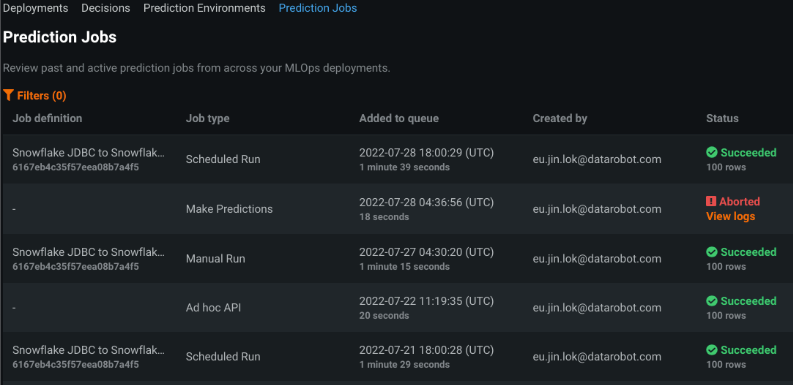


Using DataRobot's REST API, you can get more details on each of those predictions; however, you need to use Python to complete this task.


## セットアップ

### ライブラリのインポート

In [1]:
import getpass
import os

import datarobot as dr
import pandas as pd
import requests

print(os.getcwd())
token = getpass.getpass()  # Use your own token
dr.Client(token=token, endpoint="https://app.datarobot.com/api/v2")

### DataRobotに接続する

Read more about different options for [connecting to DataRobot from the client](https://docs.datarobot.com/en/docs/api/api-quickstart/api-qs.html).


In [ ]:
API_ENDPOINT = "https://app.datarobot.com/api/v2/batchPredictions"

# Enter your API key here
API_KEY = token
session = requests.Session()
session.headers = {
    "Authorization": "Bearer {}".format(API_KEY),
}
session.close()

### Fetch metadata

Use the snippet below to get metadata from your prediction jobs. The following cell displays an example of what the retrieved data looks like.


In [ ]:
resp = session.get(API_ENDPOINT)
print(resp.status_code)
df = pd.json_normalize(resp.json()["data"])
df.head()

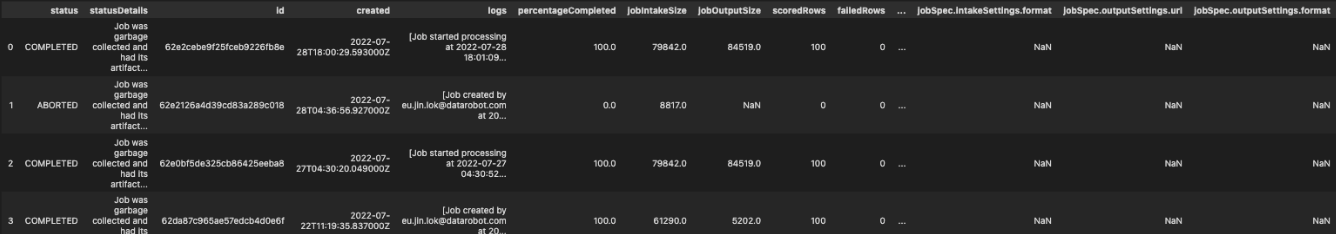


### Fetch data points

In [2]:
log1 = pd.DataFrame(df.iloc[1,])
with pd.option_context(
    "display.max_rows", 1000, "display.max_columns", 1000
):  # more options can be specified also
    display(log1)

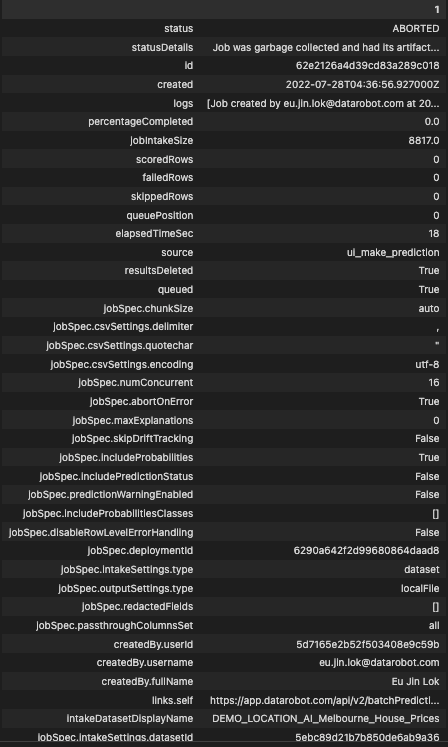


By analyzing the data points above, you can identify numerous insights:


* Status details is missing columns

* The Source field is using the UI prediction method (i.e., not using job definitions or the Python API client for batch predictions)

* `DatasetID` and `DeploymentID` are provided, which you can use for further analysis or configuration


### Use metadata for troubleshooting

You can use the metadata to inform other users about any issues or failures with predictions job and provide additional useful information to help resolve the issue. DataRobot recommends providing the following to troubleshoot:


* URL to the dataset used for prediction

* URL to the deployment

* URL to the project

* URL to the dataset used for training


The prediction dataset can be fetched from the prediction job metadata in the cells above. It also provides the dataset ID. Run the following snippet to retrieve a URL that will direct you to the dataset.


In [ ]:
datasetid = "5ebc89d21b7b850de6ab9a36"
dataset = dr.Dataset.get(datasetid)
print(dataset)
print("https://app.datarobot.com/ai-catalog/" + datasetid)

Provide the deployment ID and then run the following snippet to retrieve the URL for the deployment.


In [ ]:
deploymentid = "6290a642f2d99680864daad8"
deployment = dr.Deployment.get(deploymentid)
print(deployment)
print("https://app.datarobot.com/deployments/" + deploymentid)

Use the following cell to get the project ID using the deployment ID.


In [ ]:
# The deployment ID
deploymentid = "6290a642f2d99680864daad8"

# Define the API endpoint
API_ENDPOINT = "https://app.datarobot.com/api/v2/deployments/"

# Provide your API key here
API_KEY = token
session = requests.Session()
session.headers = {
    "Authorization": "Bearer {}".format(API_KEY),
}

session.close()

Provide the project ID and then run the following snippet to retrieve the URL for the project.


In [ ]:
projectid = "62908fa8929e0d7ef66e388e"
project = dr.Project.get(projectid)
print(project)
print("https://app.datarobot.com/projects/" + projectid)

Lastly, by pulling the URL for the dataset used for training and using the project ID above, you can get the training dataset ID.


In [ ]:
# The deployment ID
projectid = "62908fa8929e0d7ef66e388e"

# Define the API endpoint
API_ENDPOINT = "https://app.datarobot.com/api/v2/projects/"

# Provide your API key here
API_KEY = token
session = requests.Session()
session.headers = {
    "Authorization": "Bearer {}".format(API_KEY),
}


resp = session.get(API_ENDPOINT + "?projectId=" + projectid)
df = pd.json_normalize(resp.json())
df.T

session.close()

In [ ]:
datasetid = "629086ace265bd23ab9c1de7"
print("https://app.datarobot.com/ai-catalog/" + datasetid)

Click the link from the output above to access the dataset.
